In [1]:
import pandas as pd
import numpy as np
import random as rnd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
train_data = pd.read_csv("D://DataSC//Datasets//titanic//train.csv")
test_data = pd.read_csv("D://DataSC//Datasets//titanic//test.csv")
data_submit = pd.read_csv("D://DataSC//Datasets//titanic//gender_submission.csv")
combine =[train_data, test_data]

In [5]:
print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
train_data.info()
print("_"*50)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         41

In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Nankoff, Mr. Minko",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [11]:
train_data[["Pclass", "Survived"]].groupby(["Pclass"], as_index= False) \
.mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train_data[["Sex", "Survived"]].groupby(["Sex"], as_index= False) \
.mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train_data[["SibSp", "Survived"]].groupby(["SibSp"], as_index= False) \
.mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
train_data[["Parch", "Survived"]].groupby(["Parch"], as_index= False) \
.mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


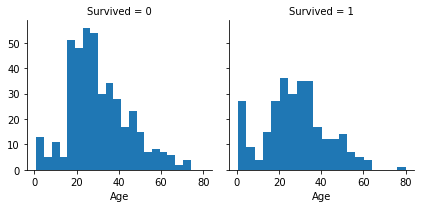

In [15]:
g = sns.FacetGrid(train_data, col="Survived")
g.map(plt.hist, "Age", bins=20);



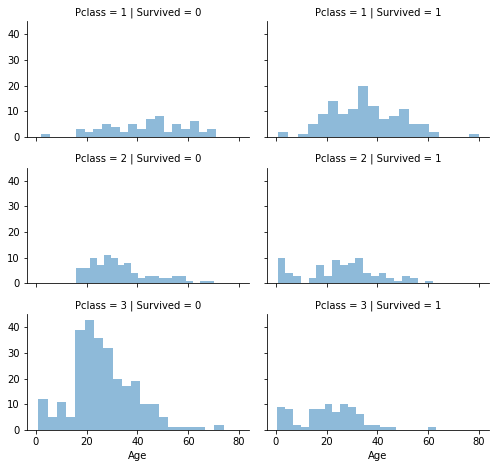

In [16]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

c:\users\kup9\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\kup9\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\kup9\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


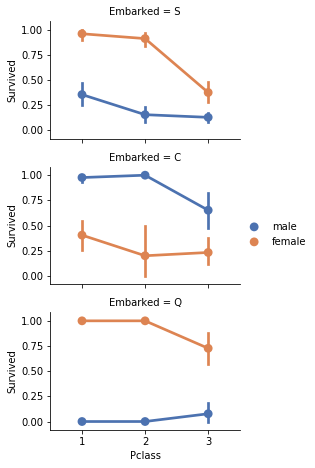

In [17]:
grid = sns.FacetGrid(train_data, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

c:\users\kup9\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


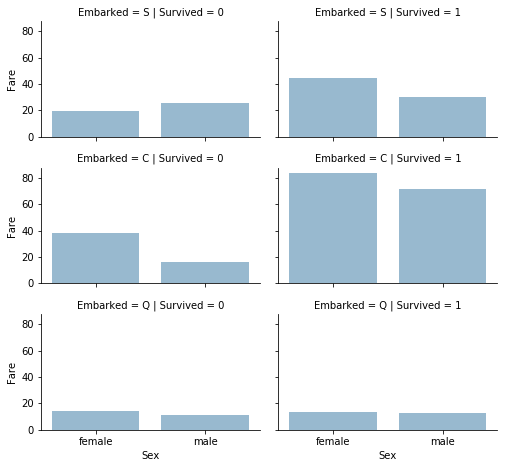

In [18]:
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [19]:
train_data = train_data.drop(["Ticket", "Cabin"], axis=1)
test_data = test_data.drop(["Ticket", "Cabin"], axis=1)
combine = [train_data, test_data]

In [20]:
for dataset in combine:
    dataset["Title"] = dataset.Name.str.extract(" ([A-Za-z]+)\.", expand=False)
pd.crosstab(train_data["Title"], train_data["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [21]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [22]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [23]:
train_data = train_data.drop(['Name', 'PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
combine = [train_data, test_data]

In [24]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


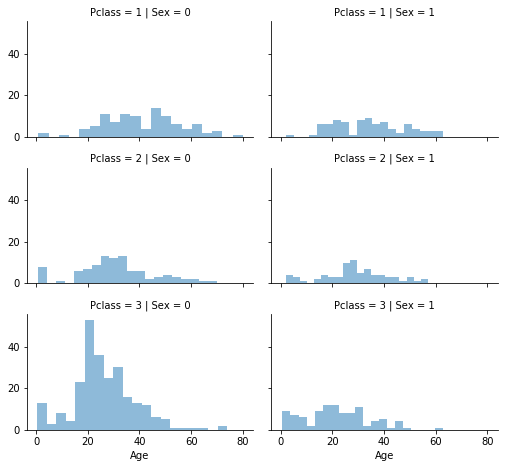

In [25]:
grid = sns.FacetGrid(train_data, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [27]:
for dataset in combine:
    dataset["Age"].fillna(dataset["Age"].median(), inplace = True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

In [29]:
for dataset in combine:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
    dataset["IsAlone"] = 1
    dataset["IsAlone"].loc[dataset["FamilySize"] > 1] = 0
    dataset["FareBin"] = pd.qcut(dataset["Fare"], 4)
    dataset["AgeBin"] = pd.cut(dataset["Age"].astype(int), 5)

c:\users\kup9\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
c:\users\kup9\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
train_data.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareBin,AgeBin
546,1,2,1,19.0,1,0,26.0000,S,3,2,0,"(14.454, 31.0]","(16.0, 32.0]"
203,0,3,0,45.5,0,0,7.2250,C,1,1,1,"(-0.001, 7.91]","(32.0, 48.0]"
804,1,3,0,27.0,0,0,6.9750,S,1,1,1,"(-0.001, 7.91]","(16.0, 32.0]"
499,0,3,0,24.0,0,0,7.7958,S,1,1,1,"(-0.001, 7.91]","(16.0, 32.0]"
191,0,2,0,19.0,0,0,13.0000,S,1,1,1,"(7.91, 14.454]","(16.0, 32.0]"
622,1,3,0,20.0,1,1,15.7417,C,1,3,0,"(14.454, 31.0]","(16.0, 32.0]"
859,0,3,0,28.0,0,0,7.2292,C,1,1,1,"(-0.001, 7.91]","(16.0, 32.0]"
325,1,1,1,36.0,0,0,135.6333,C,2,1,1,"(31.0, 512.329]","(32.0, 48.0]"
523,1,1,1,44.0,0,1,57.9792,C,3,2,0,"(31.0, 512.329]","(32.0, 48.0]"
212,0,3,0,22.0,0,0,7.2500,S,1,1,1,"(-0.001, 7.91]","(16.0, 32.0]"


In [33]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()


In [34]:
for dataset in combine:
    dataset["Embarked_Code"] = label.fit_transform(dataset["Embarked"])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

In [35]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareBin,AgeBin,Embarked_Code,AgeBin_Code,FareBin_Code
0,0,3,0,22.0,1,0,7.2500,S,1,2,0,"(-0.001, 7.91]","(16.0, 32.0]",2,1,0
1,1,1,1,38.0,1,0,71.2833,C,3,2,0,"(31.0, 512.329]","(32.0, 48.0]",0,2,3
2,1,3,1,26.0,0,0,7.9250,S,2,1,1,"(7.91, 14.454]","(16.0, 32.0]",2,1,1
3,1,1,1,35.0,1,0,53.1000,S,3,2,0,"(31.0, 512.329]","(32.0, 48.0]",2,2,3
4,0,3,0,35.0,0,0,8.0500,S,1,1,1,"(7.91, 14.454]","(32.0, 48.0]",2,2,1


In [42]:
train_data_bin = ['Sex','Pclass', 'Embarked_Code', 'Title', 'FamilySize', 
                  'AgeBin_Code', 'FareBin_Code', "IsAlone"]
train_data_y_bin = ["Survived"]

In [43]:
train_data_fin = train_data[train_data_bin]
train_data_target = train_data[train_data_y_bin]

,Sex,Pclass,Embarked_Code,Title,FamilySize,AgeBin_Code,FareBin_Code,IsAlone
0,0,3,2,1,2,1,0,0
1,1,1,0,3,2,2,3,0
2,1,3,2,2,1,1,1,1
3,1,1,2,3,2,2,3,0
4,0,3,2,1,1,2,1,1


In [44]:
from sklearn import model_selection

In [45]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(train_data_fin,
                                                                    train_data_target, 
                                                                    random_state = 0)

In [46]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

In [52]:
clf = XGBClassifier()
clf.fit(train_x, train_y)
clf.score(test_x, test_y)

0.8161434977578476

In [55]:
params = {"n_estimators":[10,20,30], "max_depth":[2,4,7,10]}
clf2 = RandomForestClassifier()

In [57]:
from sklearn.model_selection import GridSearchCV
grid_search_cv_clf = GridSearchCV(clf2, params, cv=5)

In [59]:
grid_search_cv_clf.fit(train_x, train_y)

c:\users\kup9\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kup9\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kup9\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kup9\appdata\local\programs\

c:\users\kup9\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kup9\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kup9\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kup9\appdata\local\programs\

c:\users\kup9\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\kup9\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [65]:
best_clf = grid_search_cv_clf.best_estimator_
prediction = best_clf.predict(test_data[train_data_bin])

,Sex,Pclass,Embarked_Code,Title,FamilySize,AgeBin_Code,FareBin_Code,IsAlone
0,0,3,1,1,1,2,0,1
1,1,3,2,3,2,3,0,0
2,0,2,1,1,1,4,1,1
3,0,3,2,1,1,1,1,1
4,1,3,2,3,3,1,1,0


In [66]:
answer = data_submit.drop("Survived", axis=1)
answer["Survived"] = prediction
answer.to_csv(("D://DataSC//Datasets//titanic//submission2.csv"), index=False)